In [1]:
import pandas as pd

## 1. Считаю метрики на сегодняшний день

In [2]:
### подгружаю дф с уже отмеченными нарушениями 
df = pd.read_csv('/Users/artemmaslov/Documents/analytics/livu/livu_20221205.csv', sep=';') 

In [3]:
### вывожу рабочий дф
df

,time,streamer_id,age,country,os,message_id,content,violation
0,2022-12-05 00:00:02,555,27,Russia,Android,14658752,"Сегодня был тяжелый день, я очень устала на ра...",0
1,2022-12-05 00:00:03,576,22,Russia,iOS,14658753,а сколько тебе лет?,0
2,2022-12-05 00:05:00,107553,27,Russia,Android,14658754,ты ищешь кекс здесь?,1
3,2022-12-05 00:05:00,1179,23,Russia,Android,14658755,классная музыка )))!,0
4,2022-12-05 00:05:00,107567,26,Russia,iOS,14658756,"Джек, мне нравится с тобой общаться. Но я долж...",0
...,...,...,...,...,...,...,...,...
1732,2022-12-05 23:55:01,107076,23,Russia,Android,14660484,"здорово, ты из Москвы?",0
1733,2022-12-05 23:55:02,737,23,Russia,Android,14660485,привет! 😊 🥰,0
1734,2022-12-05 23:55:03,107339,20,Russia,Android,14660486,давай созвонимся позже?,0
1735,2022-12-05 23:55:04,737,23,Russia,Android,14660487,"милый, я так соскуичлась по тебе…",0


In [4]:
### вывожу всех стримеров с нарушением
violators = df[df.violation == True][['streamer_id', 'violation']]
violators.head()

,streamer_id,violation
2,107553,1
14,107115,1
18,107115,1
109,107553,1
124,107553,1


In [5]:
### группирую стримеров по id и количеству нарушений за последние сутки
violators_group = violators.groupby('streamer_id', as_index=False).agg({'violation':'sum'}).sort_values(by = 'violation', ascending=False)

### стримеров, с количеством нарушений за сутки отправляю в отдел аналитики для применения штрафов, вплоть до бана и удаления
violators_group

,streamer_id,violation
0,107082,11
2,107553,10
4,107933,8
1,107115,2
3,107672,1


In [6]:
### создаю xlsx файл для последующей отправки тимлиду
violators_group.to_excel('/Users/artemmaslov/Documents/analytics/livu/violators_group.xlsx', index = False)

In [7]:
### создаю переменную даты
date = '2022-12-05'
date

'2022-12-05'

In [8]:
### считаю количество нарушителей
violators = violators_group['violation'].count()
violators

5

In [9]:
### считаю DAU_streamers
DAU_streamers = df['streamer_id'].nunique()
DAU_streamers

129

## 2. Считаю и обновляю файл с общей статистикой

In [10]:
# подгружаю дф с общей статистикой
statistics = pd.read_csv('/Users/artemmaslov/Documents/analytics/livu/livu_statistics.csv', sep=';') 

# статистика по нарушениям в день и количеству активных стримеров за 2022 год
statistics

,date,violators,DAU_streamers
0,2022-01-01,3,71
1,2022-01-02,2,150
2,2022-01-03,1,220
3,2022-01-04,4,260
4,2022-01-05,12,250
...,...,...,...
333,2022-11-30,1,149
334,2022-12-01,1,143
335,2022-12-02,0,147
336,2022-12-03,4,145


In [11]:
# добавляю новую строку сегодняшнего дня на основе переменных выше 
new_row = {'date':date, 'violators':violators, 'DAU_streamers':DAU_streamers}
statistics = statistics.append(new_row, ignore_index=True)

statistics

/var/folders/ck/t3n3w42d2wqg3k24242t0tfh0000gn/T/ipykernel_9463/2373455883.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics = statistics.append(new_row, ignore_index=True)


,date,violators,DAU_streamers
0,2022-01-01,3,71
1,2022-01-02,2,150
2,2022-01-03,1,220
3,2022-01-04,4,260
4,2022-01-05,12,250
...,...,...,...
334,2022-12-01,1,143
335,2022-12-02,0,147
336,2022-12-03,4,145
337,2022-12-04,7,130


In [12]:
# сохраняю дф с сегодняшней датой и данными
statistics.to_csv('/Users/artemmaslov/Documents/analytics/livu/livu_statistics.csv', index = False, sep=';')
statistics.to_excel('/Users/artemmaslov/Documents/analytics/livu/livu_statistics.xlsx', index = False)

## 3. Создаю дашборды для отчетности

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

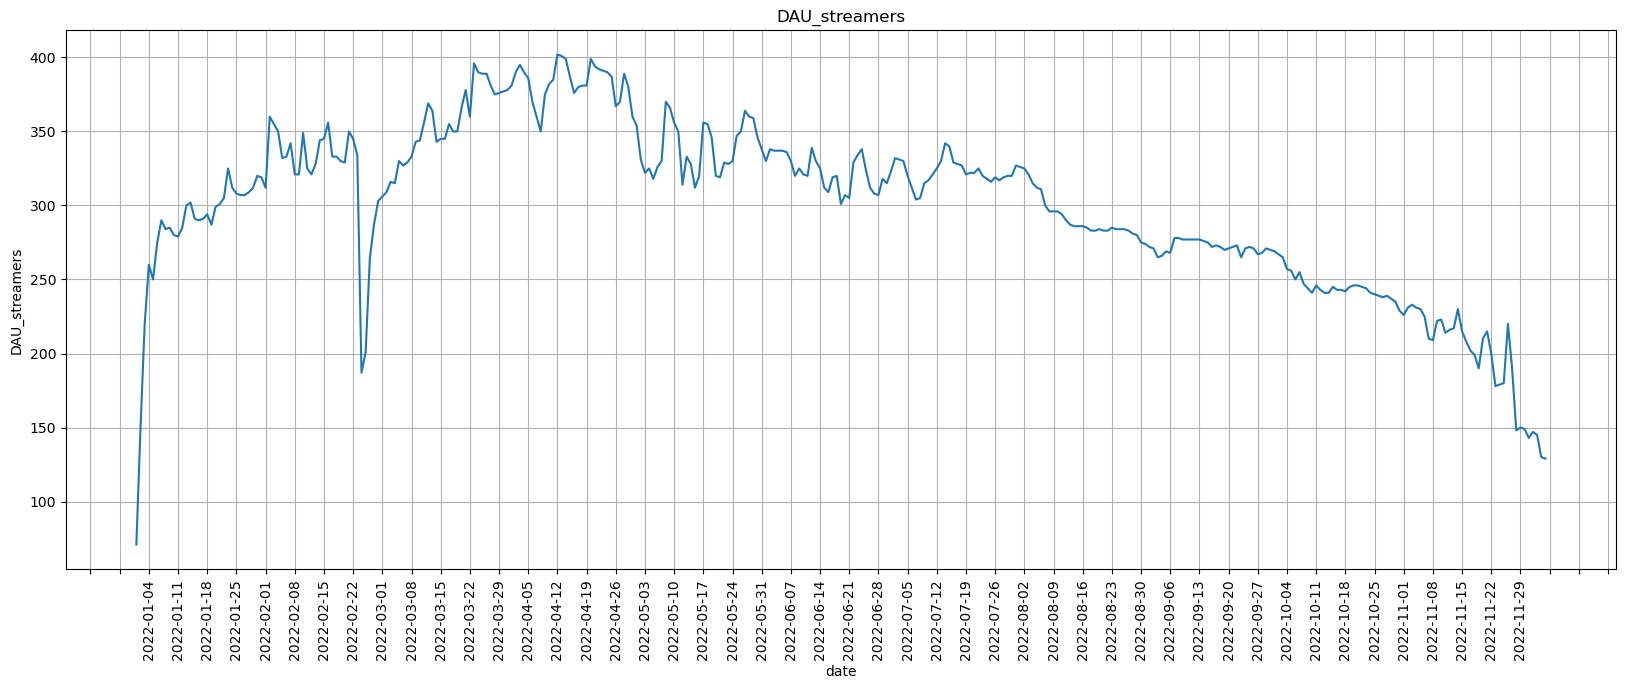

In [14]:
### создание графика DAU_streamers
fig, ax = plt.subplots(figsize=(20, 7))
sns.lineplot(x='date', y='DAU_streamers', data=statistics, ax=ax)

### поворот подписей оси x
ax.tick_params(axis='x', labelrotation=90)

### установка шага между значениями оси x
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

### создаю сетку
plt.grid(True)

### заголовок
plt.title('DAU_streamers')

### сохроняю график
plt.savefig('DAU_streamers.png')

plt.show()

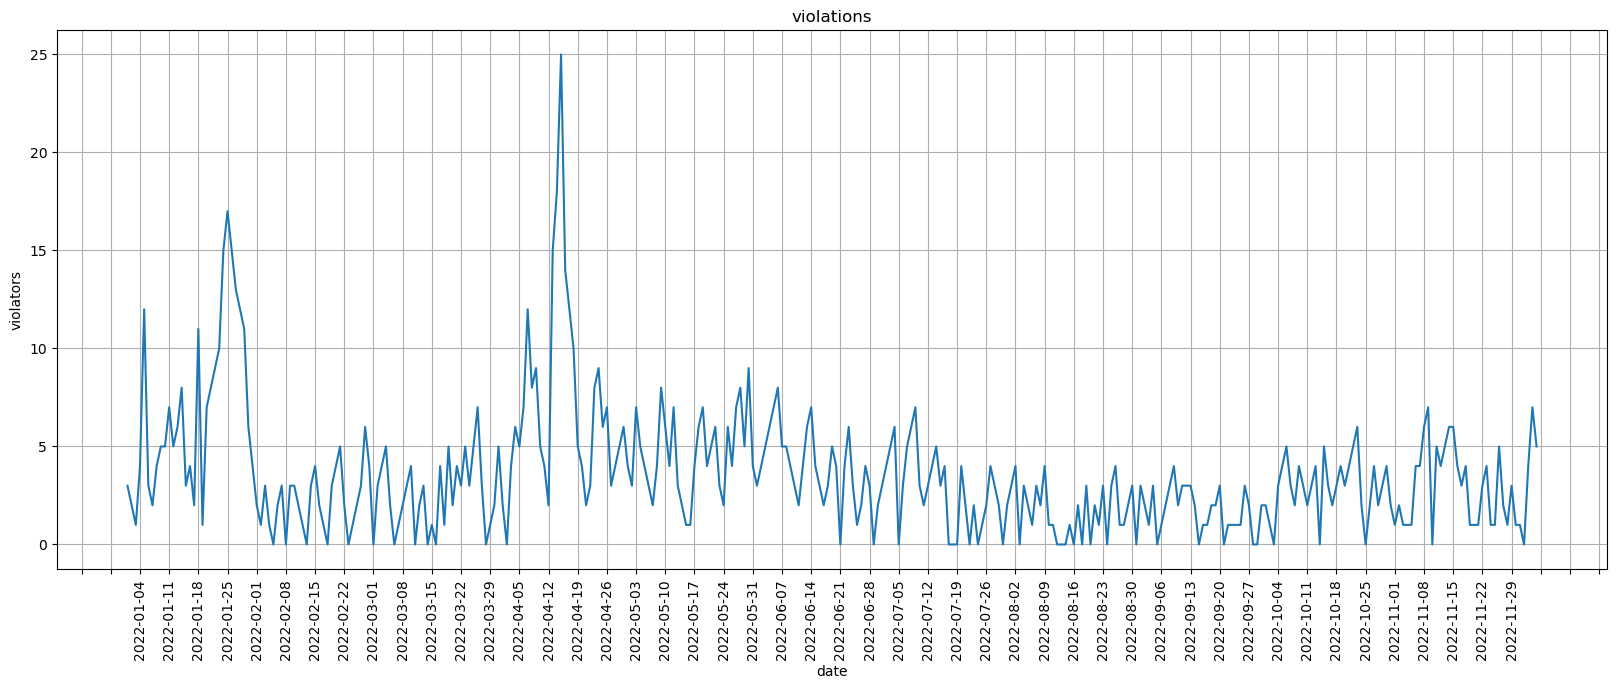

In [15]:
### создание графика violations
fig, ax = plt.subplots(figsize=(20, 7))
sns.lineplot(x='date', y='violators', data=statistics, ax=ax)

### поворот подписей оси x
ax.tick_params(axis='x', labelrotation=90)

### установка шага между значениями оси x
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))

### создаю сетку
plt.grid(True)

### заголовок
plt.title('violations')

### сохроняю график
plt.savefig('violations.png')

plt.show()

In [16]:
### для создания графика HAU_streamers сначала делаю агрегацию данных
### функция, которая принимает строку с датой и временем в формате 'гггг-мм-дд чч:мм:сс' и возвращает строку с часом в формате 'чч'
def get_hour(datetime_str):
    datetime_obj = datetime.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
    hour_str = datetime_obj.strftime('%H')
    return hour_str

### cоздаю новую колонку с часами
df['hour'] = df['time'].apply(get_hour)
HAU = df.groupby('hour')['streamer_id'].nunique().reset_index()
HAU

,hour,streamer_id
0,00,24
1,01,25
2,02,18
3,03,16
4,04,18
5,05,21
6,06,25
7,07,23
8,08,24
9,09,31


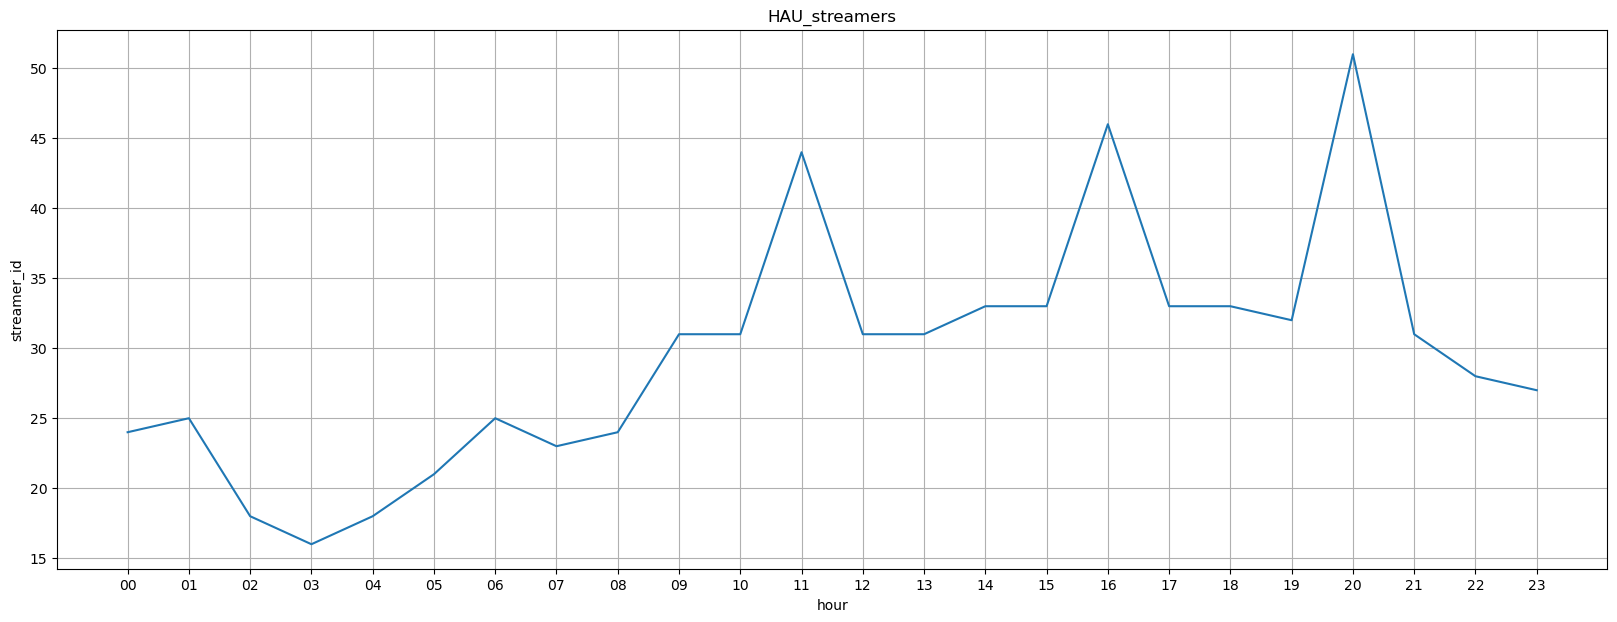

In [17]:
### создание графика HAU
fig, ax = plt.subplots(figsize=(20, 7))
sns.lineplot(x='hour', y='streamer_id', data=HAU, ax=ax)

### создаю сетку
plt.grid(True)

### заголовок
plt.title('HAU_streamers')

### сохроняю график
plt.savefig('HAU_streamers.png')

plt.show()

## 4. Автоматизация отчетности через телеграм бот

In [18]:
import telebot
import os

In [19]:
### отправляю 3 графика с основными метриками
### создаю бота и указываю токен
bot = telebot.TeleBot('6152932095:AAExue0M4t6dvSoCLFEy-x5l_aUn9Jfwm34')

### отправляю DAU_streamers в виде изображения через телеграм бот
with open('DAU_streamers.png', 'rb') as f:
    bot.send_photo(chat_id=5128718260, photo=f)

### удаляю временный файл
os.remove('DAU_streamers.png')

### отправляю violations в виде изображения через телеграм бот
with open('violations.png', 'rb') as f:
    bot.send_photo(chat_id=5128718260, photo=f)

### удаляю временный файл
os.remove('violations.png')

### отправляю HAU_streamers в виде изображения через телеграм бот
with open('HAU_streamers.png', 'rb') as f:
    bot.send_photo(chat_id=5128718260, photo=f)

### удаляю временный файл
os.remove('HAU_streamers.png')

In [20]:
### отправляю файл excel с нарушителями за сегодняшний день 
### открываю файл excel в бинарном режиме и отправляем его через телеграм бот
with open('/Users/artemmaslov/Documents/analytics/livu/violators_group.xlsx', 'rb') as file:
    bot.send_document(chat_id=5128718260, document=file)